In [2]:
from time import sleep
from random import randrange
import numpy as np
import pandas as pd
from keras.utils.vis_utils import plot_model
from tensorflow import keras

import os
import sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("Configurations"))))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("utils"))))
import Configurations as setting
from utils import dataframeUtil
from utils import plotUtils
from utils import statisticsUtils

In [3]:
  
train_df = dataframeUtil.concatenateTowCSV("../"+setting.trendUptrainDatasetName,"../"+setting.trendDowntrainDatasetName,setting.targetColumName_trendUp,setting.targetColumName_trendDown)
test_df = dataframeUtil.concatenateTowCSV("../"+setting.trendUptestDatasetName,"../"+setting.trendDowntestDatasetName,setting.targetColumName_trendUp,setting.targetColumName_trendDown)
#print(train_df.head())
x = train_df.iloc[:,0:setting.neuralInputsNumber].values
y = train_df.iloc[:,setting.neuralInputsNumber:setting.neuralInputsNumber+2].values

x_with_slope=statisticsUtils.addReqSlope(x)


test_x = test_df.iloc[:,0:setting.neuralInputsNumber].values
test_y = test_df.iloc[:,setting.neuralInputsNumber:setting.neuralInputsNumber+2].values


d:\projekts\control-chart\utils\dataframeUtil.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = pd1.append(pd2, ignore_index=True)
d:\projekts\control-chart\utils\dataframeUtil.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = pd1.append(pd2, ignore_index=True)


In [5]:
#x = x_with_slope 
#neuralInputsNumber = setting.neuralInputsNumber+1
neuralInputsNumber = setting.neuralInputsNumber
model = keras.Sequential([
	keras.layers.Dense(512, input_shape=(neuralInputsNumber,), activation='relu'),
	keras.layers.Dense(256, activation='relu'),
	keras.layers.Dropout(0.3),
    keras.layers.Dense(512, activation='relu'),
	keras.layers.Dropout(0.3),
	keras.layers.Dense(128, activation='relu'),
	keras.layers.Dropout(0.4),
	keras.layers.Dense(512, activation='relu'),
	keras.layers.Dropout(0.4),
	keras.layers.Dense(2, activation='sigmoid')])

model.compile(optimizer='adam', 
	          loss=keras.losses.BinaryCrossentropy(from_logits=True),
	          metrics=['accuracy'])

hist =model.fit(x, y, batch_size=64, epochs=10)
#print (hist.history['accuracy'][-1])
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
print("EVALUATION")
model.evaluate(test_x, test_y)

Epoch 1/10
163/163 [==============================] - 1s 3ms/step - loss: 0.0257 - accuracy: 0.9775
Epoch 2/10
163/163 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.9764
Epoch 3/10
163/163 [==============================] - 0s 2ms/step - loss: 6.7292e-04 - accuracy: 0.9763
Epoch 4/10
163/163 [==============================] - 0s 2ms/step - loss: 1.4605e-04 - accuracy: 0.9854
Epoch 5/10
163/163 [==============================] - 0s 2ms/step - loss: 8.6424e-06 - accuracy: 0.9889
Epoch 6/10
163/163 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.9807
Epoch 7/10
163/163 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.9879
Epoch 8/10
163/163 [==============================] - 0s 2ms/step - loss: 1.5120e-04 - accuracy: 0.9860
Epoch 9/10
163/163 [==============================] - 0s 2ms/step - loss: 2.1939e-04 - accuracy: 0.9830
Epoch 10/10
163/163 [==============================] - 0s 2ms/step - loss: 3.831

[2.060140104731545e-05, 0.9999038577079773]

0.0000000000  1.0000000000 
Prediction [[0. 1.]]
it should be [[0. 1.]]


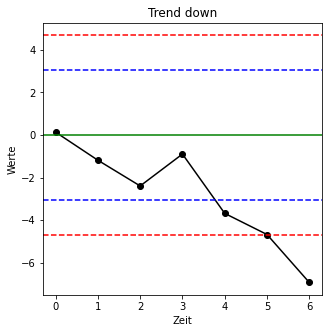

In [21]:
a = randrange((setting.generatedTrainDataOutputNumber_False + setting.generatedTrainDataOutputNumber_True -1)*2)
b = a+1
predict_x = test_df.iloc[a:b, 0:setting.neuralInputsNumber].values

prediction = model.predict(predict_x)
print("%.10f " % prediction[0][0],"%.10f " % prediction[0][1])
prediction = np.round(prediction)
print("Prediction", prediction)
print("it should be", test_df.iloc[a:b, setting.neuralInputsNumber:setting.neuralInputsNumber+2].values)
plotUtils.plotChartWith2Detection(predict_x[0],prediction,"Trend up","Trend down")


In [9]:
model.save('../model/trend')
#model = keras.models.load_model('path/to/location')

INFO:tensorflow:Assets written to: ../model/trend\assets


In [7]:

onlineSimulation=test_x.flatten()
windowSize=10
outputSize = setting.neuralInputsNumber
index = 0


  Trend up      Trend down  
0.0033397377  0.0000017870 
Prediction [[0. 0.]]


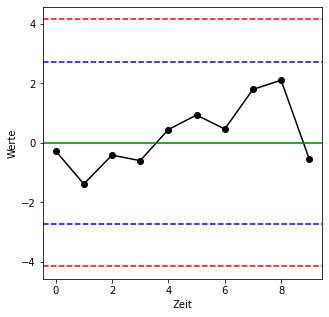

In [30]:

output= [onlineSimulation[index:index+outputSize]]
output = np.array(output)
prediction = model.predict(output)
print("  Trend up " ,"    Trend down  " )
print("%.10f " % prediction[0][0],"%.10f " % prediction[0][1])
prediction = np.round(prediction)
print("Prediction", prediction)
#plotUtils.plotChart(output[0], "detection")
plotUtils.plotChartWith2Detection(output[0],prediction,"Trend up","Trend down")
index = index + windowSize